In [1]:
import pickle as pkl
import scipy.stats as stats
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
%matplotlib inline

/home/chintan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
with open('CL_super_clean_car_all.pkl', 'rb') as picklefile: 
    df1 = pkl.load(picklefile)
df1.shape

(3074, 8)

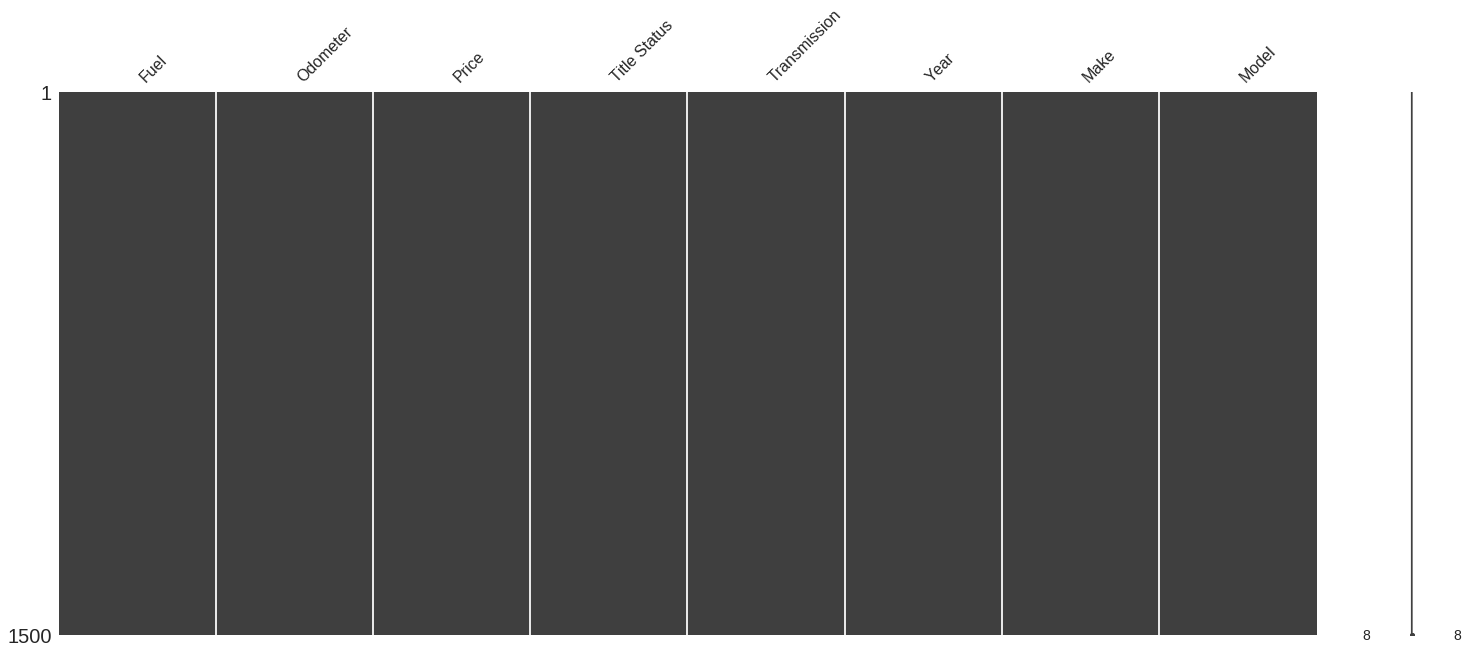

In [3]:
import missingno as msno
msno.matrix(df1.sample(1500))

In [4]:
df1=df1.rename(columns={"Title Status": "Title"})

In [5]:
df1.columns

Index(['Fuel', 'Odometer', 'Price', 'Title', 'Transmission', 'Year', 'Make',
       'Model'],
      dtype='object')

In [6]:
def transforming_fuel(string):
    if string=='gas':
        return('gas')
    else:
        return('other')

In [7]:
df1['Fuel']=df1['Fuel'].apply(transforming_fuel)
df1['Fuel'].value_counts()

gas      2642
other     432
Name: Fuel, dtype: int64

In [8]:
def transforming_title_status(string):
    if string=='clean':
        return('clean')
    elif string=='rebuilt':
        return('rebuilt')
    else:
        return('salvage or missing')

In [9]:
df1['Title']=df1['Title'].apply(transforming_title_status)
df1['Title'].value_counts()

clean                 2852
rebuilt                156
salvage or missing      66
Name: Title, dtype: int64

In [10]:
def transforming_transmission(string):
    if string=='automatic':
        return('automatic')
    elif string=='manual':
        return('manual')
    else:
        return('automatic')

In [11]:
df1['Transmission']=df1['Transmission'].apply(transforming_transmission)
df1['Transmission'].value_counts()

automatic    2651
manual        423
Name: Transmission, dtype: int64

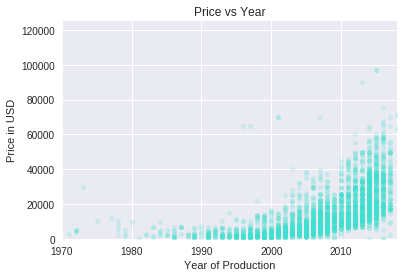

In [19]:
df1.plot(x='Year',y='Price',kind='scatter',xlim=[1970,2018],ylim=[0,125000],alpha=0.20, color='turquoise',grid='on',title='Price vs Year')
plt.xlabel('Year of Production')
plt.ylabel('Price in USD')
# plt.show()
plt.savefig('price_year1.png', format='png', dpi=1000,bbox_inches='tight')

In [237]:
# Define the model
lm1 = smf.ols('Price ~ Year + Odometer', data=df1)
# Fit the model
fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     663.4
Date:                Tue, 03 Oct 2017   Prob (F-statistic):          3.31e-240
Time:                        17:58:51   Log-Likelihood:                -33107.
No. Observations:                3074   AIC:                         6.622e+04
Df Residuals:                    3071   BIC:                         6.624e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.543e+06    5.9e+04    -26.146      0.000   -1.66e+06   -1.43e+06
Year         777.7339     29.365     26.485      0.000     720.157     835.311
Odometer      -0.0276      0.002    -12.366      0.000      -0.032      -0.023
==============================================================================
Omnibus:                     2682.441   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           178613.491
Skew:                           3.801   Prob(JB):                         0.00
Kurtosis:                      39.561   Cond. No.                     3.97e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

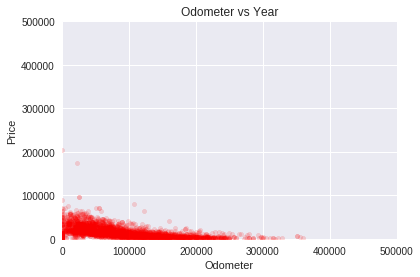

In [238]:
import matplotlib.pyplot as plt
df1.plot(x='Odometer',y='Price',kind='scatter',xlim=[0,500000],ylim=[0,500000],alpha=0.15, color='red',grid='on',title='Odometer vs Year')
plt.show()

In [239]:
import patsy
X1=patsy.dmatrix('Fuel',data=df1,return_type='dataframe')
X1.head()

,Intercept,Fuel[T.other]
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
9,1.0,0.0


In [240]:
import patsy
X2=patsy.dmatrix('Transmission',data=df1,return_type='dataframe')
X2.head()

,Intercept,Transmission[T.manual]
1,1.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
9,1.0,1.0


In [241]:
import patsy
X3=patsy.dmatrix('Title',data=df1,return_type='dataframe')
X3.head()

,Intercept,Title[T.rebuilt],Title[T.salvage or missing]
1,1.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
9,1.0,0.0,0.0


In [242]:
type(X3)

pandas.core.frame.DataFrame

In [243]:
y = df1['Price']
import pandas as pd
df2=pd.merge(df1, X1,left_index=True, right_index=True)
df3=pd.merge(df2, X2,left_index=True, right_index=True)
x=pd.merge(df3, X3,left_index=True, right_index=True)
del x['Transmission']
del x['Title']
del x['Make']
del x['Model']
del x['Fuel']
del x['Price']

x.head()

,Odometer,Year,Intercept_x,Fuel[T.other],Intercept_y,Transmission[T.manual],Intercept,Title[T.rebuilt],Title[T.salvage or missing]
1,127299.0,1998,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,215250.0,1996,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3,215250.0,1996,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,23700.0,2015,1.0,0.0,1.0,0.0,1.0,0.0,0.0
9,186200.0,2004,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [244]:
lsm = sm.OLS(y,x)
fit = lsm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     268.3
Date:                Tue, 03 Oct 2017   Prob (F-statistic):          1.32e-276
Time:                        17:58:52   Log-Likelihood:                -33010.
No. Observations:                3074   AIC:                         6.603e+04
Df Residuals:                    3067   BIC:                         6.608e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Odometer                       -0.0279      0.002    -12.859      0.000      -0.032      -0.024
Year                          729.5996     29.205     24.982      0.000     672.337     786.862
Intercept_x                 -4.824e+05   1.96e+04    -24.650      0.000   -5.21e+05   -4.44e+05
Fuel[T.other]                6611.5600    588.654     11.232      0.000    5457.364    7765.756
Intercept_y                 -4.824e+05   1.96e+04    -24.650      0.000   -5.21e+05   -4.44e+05
Transmission[T.manual]       -371.6839    597.626     -0.622      0.534   -1543.472     800.104
Intercept                   -4.824e+05   1.96e+04    -24.650      0.000   -5.21e+05   -4.44e+05
Title[T.rebuilt]            -6151.4612    920.378     -6.684      0.000   -7956.080   -4346.842
Title[T.salvage or missing] -5255.0563   1392.715     -3.773      0.000   -7985.806   -2524.307
==============================================================================
Omnibus:                     2786.920   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           229000.485
Skew:                           3.971   Prob(JB):                         0.00
Kurtosis:                      44.531   Cond. No.                     1.20e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.14e-37. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

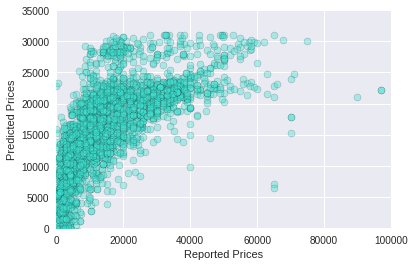

In [245]:
y_n=fit.predict()
np.set_printoptions(threshold=np.nan)
y_ns=pd.Series(y_n)
plt.scatter(y, y_ns,alpha=0.4,color='turquoise',edgecolor='black')
plt.xlim(0,100000)
plt.ylim(0,35000)
plt.xlabel('Reported Prices')
plt.ylabel('Predicted Prices')
plt.prism()
plt.show()

In [246]:
def diagnostic_plot(x, y):
    fig = plt.figure(figsize=(12, 12))
    
    rgr = LinearRegression()
    if len(x.shape) == 1:
        x = x[:,None]
    rgr.fit(x,y)
    pred = rgr.predict(x)
    res = y - pred

    ax = fig.add_subplot(2, 2, 1)
    ax.scatter(x[:,0], y, label='truth')
    ax.scatter(x[:,0], pred, color='salmon', label='predictions')
    ax.set(title="Regression fit", 
           xlabel='x', ylabel='y')
    ax.legend(loc='best')
    
    ax = fig.add_subplot(2, 2, 2)
    ax.scatter(pred, res)
    ax.hlines([0], xmin=min(pred), xmax=max(pred), color='k')
    ax.set(title="Residual plot",
           xlabel='prediction', ylabel='residuals')
    
    ax = fig.add_subplot(2, 2, 3)
    # Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=ax)
    ax.set(title="Normal Q-Q plot")
    
    eiej = [
        ei*ej 
        for (i, ei), (j, ej) in product(enumerate(res), repeat=2)
        if i < j]
    ax = fig.add_subplot(2, 2, 4)
    ax = pd.Series(res).hist()
    ax.set(title='Histogram of Residuals',
           xlabel='Residuals'.format(np.mean(eiej)))

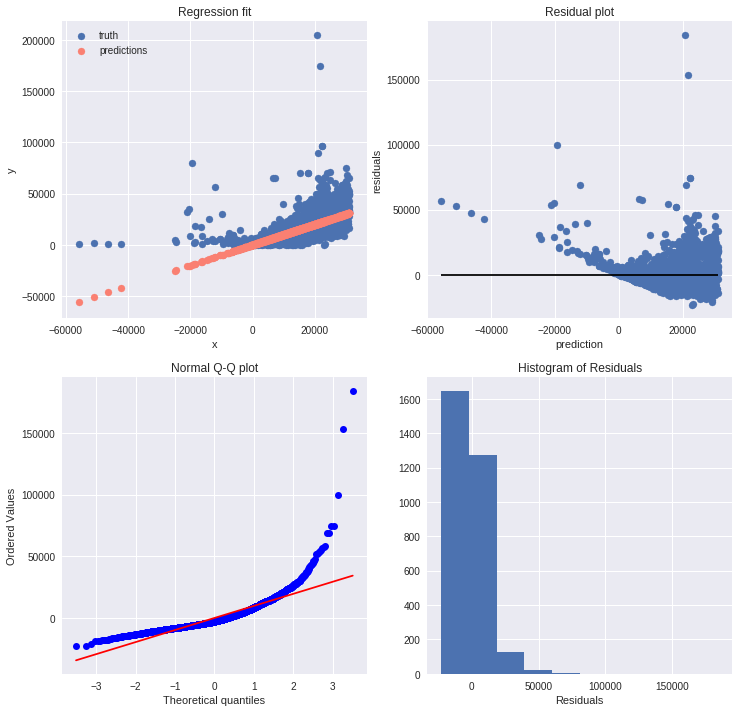

In [247]:
diagnostic_plot(y_n, y)

In [248]:
makes_to_remove=df1['Make'].value_counts()[-20:]
print(df1.shape)
for x in range(len(makes_to_remove)):
    df1=df1[df1['Make']!=makes_to_remove.index[x]]
print(df1.shape)

(3074, 8)
(2905, 8)


In [249]:
models_to_remove=df1['Model'].value_counts()[-200:]
for x in range(len(models_to_remove)):
    df1=df1[df1['Model']!=models_to_remove.index[x]]
print(df1.shape)

(2476, 8)


In [250]:
with open('Data_cleaned.pkl', 'wb') as picklefile:
    pkl.dump(df1, picklefile)